In [15]:
import sympy as sym

In [16]:
c, a, wealth, utility = sym.symbols("c a w u", real=True, positive=True)
CRRA, WealthShare, WealthShift = sym.symbols(
    "sigma delta  \\underline{a}", real=True, positive=True
)

In [17]:
w = a + WealthShift
w

\underline{a} + a

In [18]:
u = (c ** (1 - WealthShare) * w**WealthShare) ** (1 - CRRA) / (1 - CRRA)
u

(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(1 - sigma)

In [19]:
u_alt = u.replace(w, wealth)
u_alt

(c**(1 - delta)*w**delta)**(1 - sigma)/(1 - sigma)

In [20]:
dudc = sym.diff(u, c)
dudc.replace(w, wealth).simplify()

(c**(1 - delta)*w**delta)**(1 - sigma)*(1 - delta)/c

In [21]:
dudw = u.replace(w, wealth).diff(wealth)
dudw.simplify()

delta*(c**(1 - delta)*w**delta)**(1 - sigma)/w

In [22]:
duda = sym.diff(u, a)
duda.replace(w, wealth).simplify()

delta*(c**(1 - delta)*w**delta)**(1 - sigma)/w

In [23]:
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.ConsumptionSaving.ConsWealthPortfolioModel import WealthPortfolioConsumerType
from HARK.utilities import plot_funcs

In [24]:
cycles = 0
port_agent = PortfolioConsumerType(cycles=cycles)
wealth_agent = WealthPortfolioConsumerType(cycles=cycles)

In [25]:
port_agent.solve()
# port_agent.completed_cycles

In [26]:
wealth_agent.solve()
# wealth_agent.completed_cycles

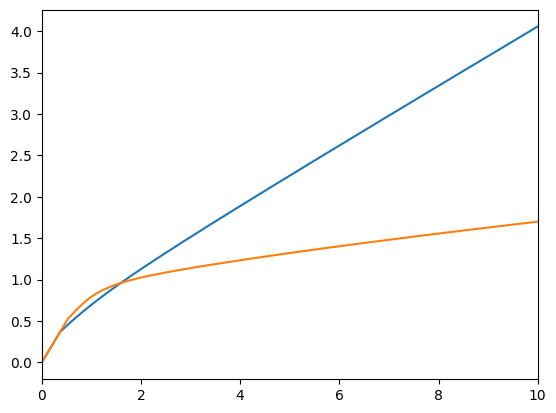

In [27]:
plot_funcs([wealth_agent.solution[0].cFuncAdj, port_agent.solution[0].cFuncAdj], 0, 10)

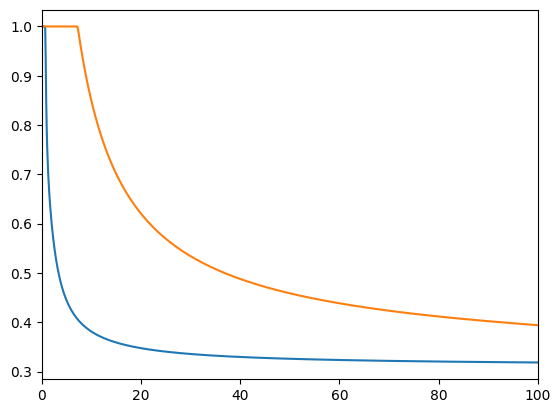

In [28]:
plot_funcs(
    [wealth_agent.solution[0].ShareFuncAdj, port_agent.solution[0].ShareFuncAdj], 0, 100
)